<a href="https://colab.research.google.com/github/adbioc/video2image/blob/main/video2image_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import cv2

In [9]:
os.chdir("/content/drive/My Drive/thermal_video/Control")


In [10]:
!ls

C1.avi	C2.avi	C3.avi	C4.avi


## A function to capture a video and determine 
- frameCount 
- frameWidth 
- frameHeight

In [11]:
def v2im(videofile):
  cap=cv2.VideoCapture(videofile)
  frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
  return(frameCount,frameWidth,frameHeight)

In [12]:
C,W,H=v2im('C2.avi')
print("Frame count=",C,"Image height=",H,"Image Width=",W)

Frame count= 270 Image height= 423 Image Width= 1012


## Extracting n-th frame from a video and show the image 

### First capture the frame buffer 

In [13]:
fc = 0
ret = True
video='C2.avi'
buf = np.empty((C, H, W, 3), np.dtype('uint8'))
cap=cv2.VideoCapture(video)
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
while (fc < frameCount  and ret):
    ret, buf[fc] = cap.read()
    fc += 1

cap.release()
buf.shape


(270, 423, 1012, 3)

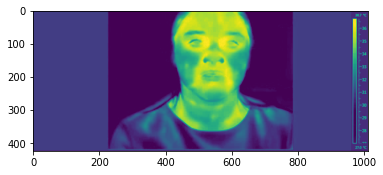

In [14]:
plt.imshow(buf[0,:,:,1])



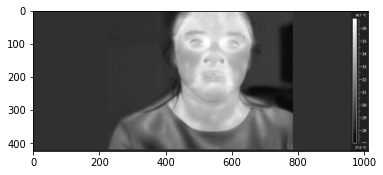

In [15]:
grayFrame = cv2.cvtColor(buf[10,:,:,:], cv2.COLOR_BGR2GRAY)
plt.imshow(grayFrame,cmap ='gray')

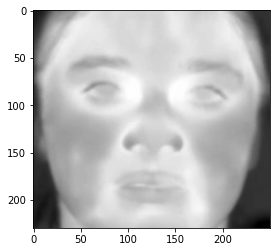

In [28]:
h=230
w=250
x=420
y=10
crop_img = grayFrame[y:y+h, x:x+w]
crop_img.shape
plt.imshow(crop_img,cmap='gray')

# Function to extract cropped frames 

In [23]:
def bufproc(video,N):
  cap=cv2.VideoCapture(video)
  frameCount, frameHeight, frameWidth=v2im(video)
  frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
  buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))
  fc=0
  ret=True
  while (fc < frameCount  and ret):
    ret, buf[fc] = cap.read()
    fc += 1
  cap.release()
  im=buf[N,:,:,1]
  #plt.imshow(im)
  return im,buf

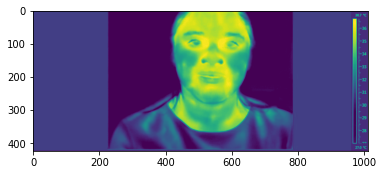

In [25]:
im,buf=bufproc('C2.avi',100)
plt.imshow(im)

(423, 1012)

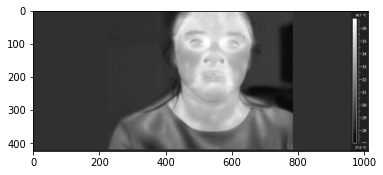

In [26]:
grayFrame = cv2.cvtColor(buf[10,:,:,:], cv2.COLOR_BGR2GRAY)
plt.imshow(grayFrame,cmap ='gray')
grayFrame.shape

## Extracts a frame N from a video , converts it to gray and then shows the image

In [33]:
def im2gray(video,N,x,y,h,w):
  im,buf=bufproc(video,N)
  grayFrame = cv2.cvtColor(buf[N,:,:,:], cv2.COLOR_BGR2GRAY)
  crop_img = grayFrame[y:y+h, x:x+w]
  #plt.imshow(crop_img,cmap ='gray')
  return crop_img

im2gray('C2.avi',10,x,y,h,w)

array([[31, 31, 32, ..., 57, 57, 57],
       [31, 31, 32, ..., 57, 57, 57],
       [32, 32, 32, ..., 57, 57, 57],
       ...,
       [40, 40, 39, ..., 11, 11, 11],
       [42, 42, 42, ..., 11, 11, 11],
       [44, 44, 44, ..., 11, 11, 11]], dtype=uint8)

In [34]:
def TS(video,x,y,h,w,low,high):
  C,W,H=v2im(video)
  TS = np.zeros(C,)
  for t in range(C):
    crop_img=im2gray(video,t,x,y,h,w)
    i,j = np.where((crop_img>low)&(crop_img<high))
    AA= crop_img[i,j]
    TS[t] = AA.mean()
  plt.plot(TS)
  return TS



# CONTROL

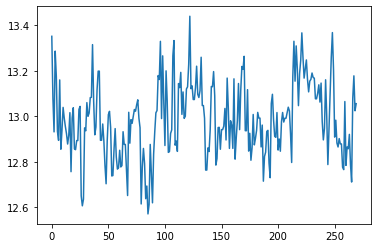

In [35]:
low=10
high=20

video='C2.avi'
TS_C2=TS(video,x,y,h,w,low,high)



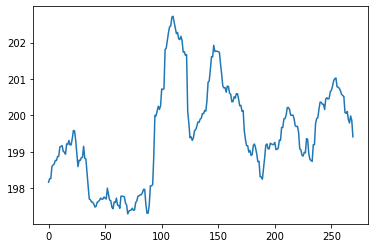

In [36]:
low=120
high=255


video='C2.avi'
TS_C2H=TS(video,x,y,h,w,low,high)
